### Price Of USA house

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'seaborn version : {sns.__version__}')

pandas version : 1.5.2
numpy version : 1.24.1
seaborn version : 0.12.2


In [3]:
usa_price = pd.read_csv(r'D:\DATASET\USA_Housing.csv')
usa_price

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


* Avg.Area Income = ค่าเฉลี่ยรายได้ของคนในพื้นที่
* Avg.Area House Age = ค่าเฉลี่ยอายุบ้าน
* Avg.Area Number of Rooms = ค่าเฉลี่ยจำนวนห้อง
* Avg.Area Number of Bedrooms = ค่าเฉลี่ยห้องนอน
* Area Population = ประชากรในพื้นที่
* Price = ราคา
* Address = ที่อยู่

#### Check missing values

In [4]:
usa_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### Check normal distribution and use widgets

In [5]:
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual

In [106]:
@interact(df = pd.Series(usa_price.loc[:,usa_price.dtypes == float].columns))

def normal(df):
    plt.subplots(figsize=(8,5))
    sns.distplot(usa_price[df],kde=False)
    plt.ylabel("count")

interactive(children=(Dropdown(description='df', options=('Avg. Area Income', 'Avg. Area House Age', 'Avg. Are…

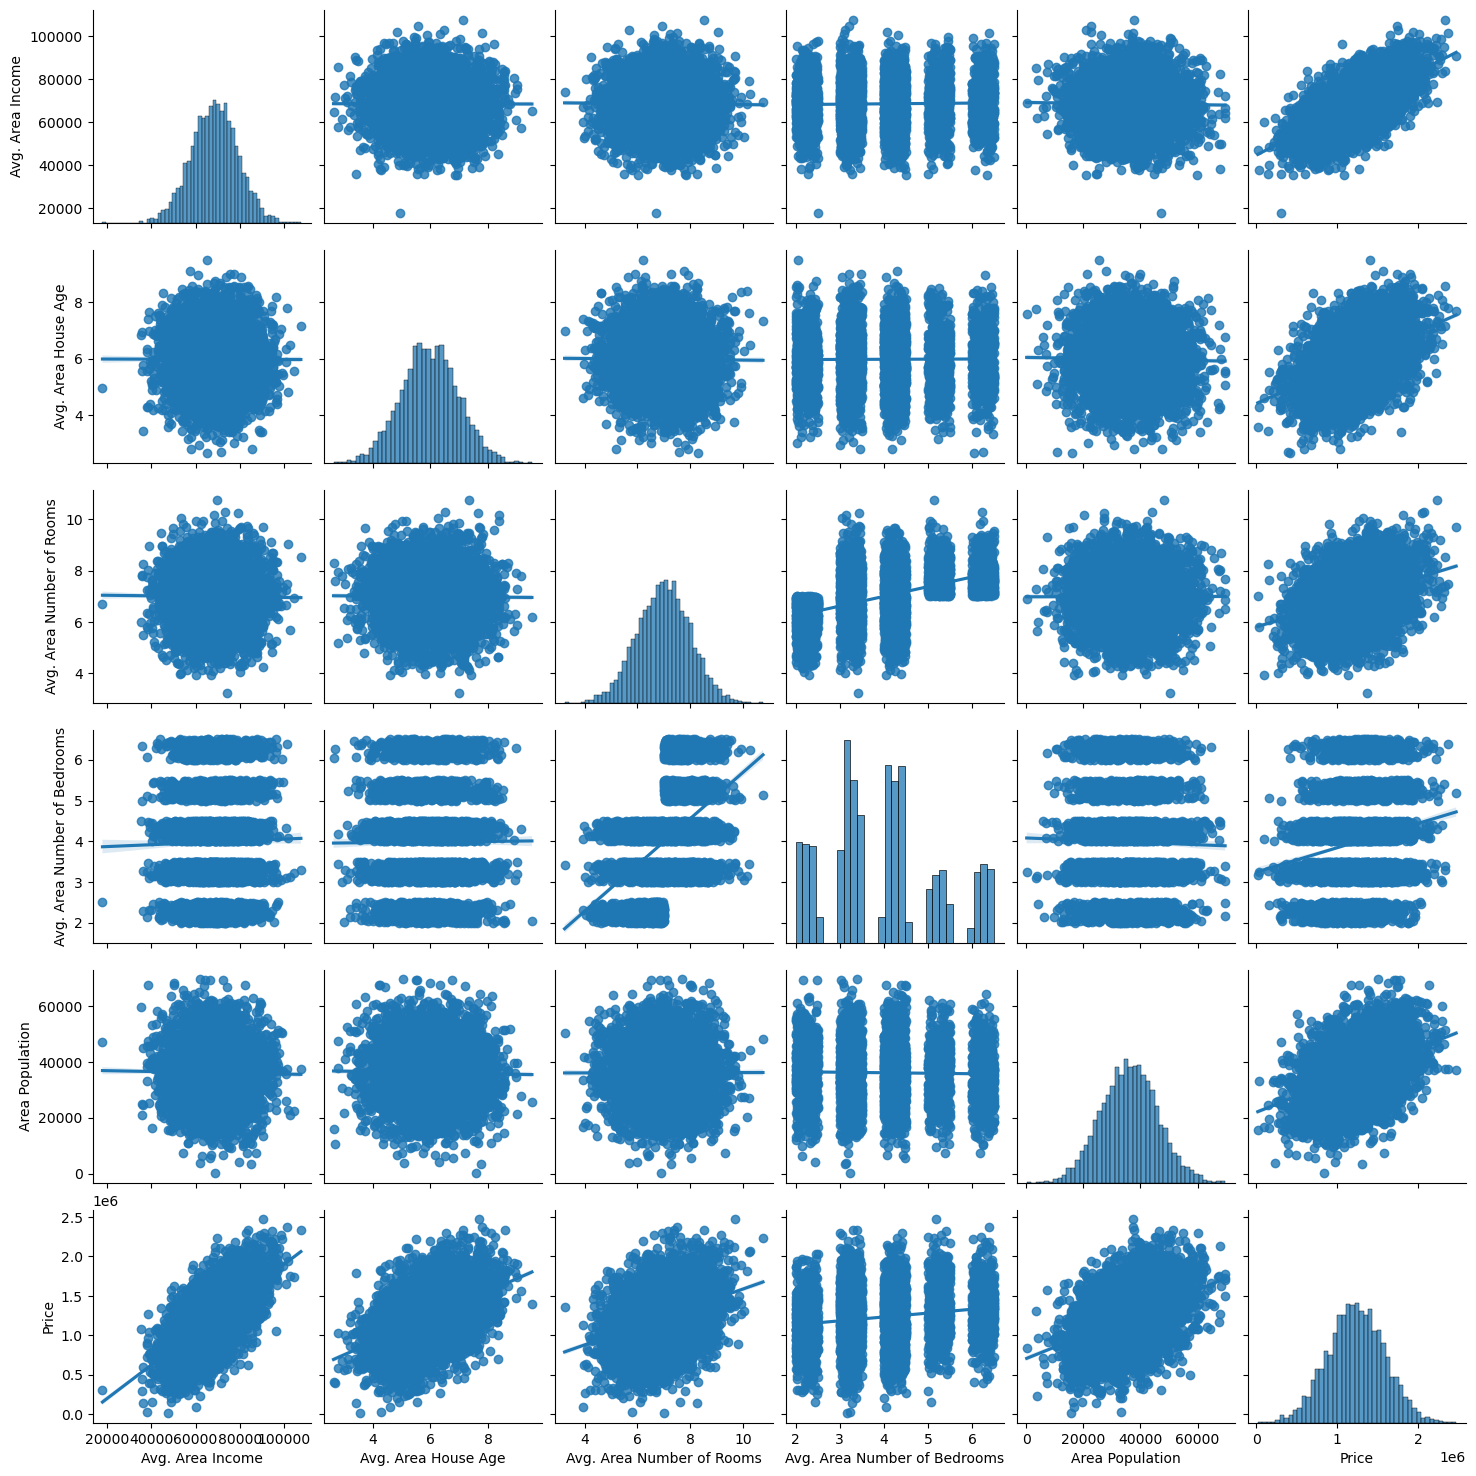

In [127]:
sns.pairplot(usa_price,kind='reg')

#### split data for train and test model

In [8]:
from sklearn.model_selection import train_test_split

X = usa_price[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',\
              'Area Population']]
y = usa_price['Price']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=99)

#### Use Model Linear regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
model.intercept_

-2662966.163066922

In [11]:
model.coef_

array([2.17131035e+01, 1.66615038e+05, 1.21336180e+05, 2.75060304e+03,
       1.52303490e+01])

In [12]:
y_pred = model.predict(x_test)
y_pred

array([1067598.3053538 , 1029256.53287694, 1200888.09132294, ...,
        895364.22050493, 1717055.5760045 ,  616573.45133194])

In [13]:
model.score(x_train,y_train)

0.9165178415277722

In [14]:
model.score(x_test,y_test)

0.9211543991762884

In [15]:
dc = x_test
dc

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1034,74740.732876,5.625513,5.787261,4.36,29954.617619
250,51949.295703,6.209803,8.051118,5.28,35336.063054
2578,51445.186752,6.841166,7.482817,5.16,44966.067802
3525,79631.587772,6.458640,7.690480,5.30,50954.001981
3533,65152.580233,5.893075,6.116973,3.17,47984.612295
...,...,...,...,...,...
836,69689.629698,4.065513,6.311315,4.46,27438.689408
2067,88799.301636,5.649911,5.058461,4.24,39139.002907
1139,65837.116938,6.304585,6.503946,4.09,18249.720595
2515,81149.725947,5.481563,7.076297,3.45,54929.670238


In [16]:
dc['Price'] = y_test
dc

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1034,74740.732876,5.625513,5.787261,4.36,29954.617619,1.168355e+06
250,51949.295703,6.209803,8.051118,5.28,35336.063054,1.086072e+06
2578,51445.186752,6.841166,7.482817,5.16,44966.067802,1.093873e+06
3525,79631.587772,6.458640,7.690480,5.30,50954.001981,1.882119e+06
3533,65152.580233,5.893075,6.116973,3.17,47984.612295,1.167422e+06
...,...,...,...,...,...,...
836,69689.629698,4.065513,6.311315,4.46,27438.689408,8.436332e+05
2067,88799.301636,5.649911,5.058461,4.24,39139.002907,1.616631e+06
1139,65837.116938,6.304585,6.503946,4.09,18249.720595,1.025909e+06
2515,81149.725947,5.481563,7.076297,3.45,54929.670238,1.798233e+06


In [17]:
dc['prediction_price'] = y_pred
dc

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,prediction_price
1034,74740.732876,5.625513,5.787261,4.36,29954.617619,1.168355e+06,1.067598e+06
250,51949.295703,6.209803,8.051118,5.28,35336.063054,1.086072e+06,1.029257e+06
2578,51445.186752,6.841166,7.482817,5.16,44966.067802,1.093873e+06,1.200888e+06
3525,79631.587772,6.458640,7.690480,5.30,50954.001981,1.882119e+06,1.865948e+06
3533,65152.580233,5.893075,6.116973,3.17,47984.612295,1.167422e+06,1.215325e+06
...,...,...,...,...,...,...,...
836,69689.629698,4.065513,6.311315,4.46,27438.689408,8.436332e+05,7.235469e+05
2067,88799.301636,5.649911,5.058461,4.24,39139.002907,1.616631e+06,1.428040e+06
1139,65837.116938,6.304585,6.503946,4.09,18249.720595,1.025909e+06,8.953642e+05
2515,81149.725947,5.481563,7.076297,3.45,54929.670238,1.798233e+06,1.717056e+06


Text(0.5, 0, 'y_test')

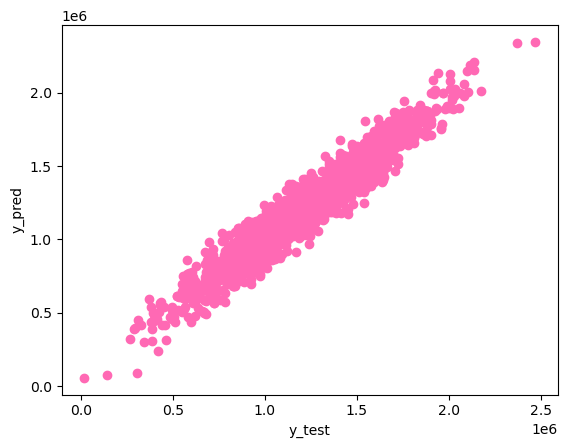

In [116]:
plt.scatter(y_test,y_pred,color='hotpink')
plt.ylabel('y_pred')
plt.xlabel('y_test')

#### summary linear regression

In [143]:
import sklearn.metrics as metrics
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2 = metrics.r2_score(y_test,y_pred)
print(f'R2 Coefficient of determination : {round(r2,2)}')
print(f'MSE Mean Squared Error : {round(mse,2)}')
print(f'MAE Mean absolute_error : {round(mae,2)}')
print(f'RMSE Mean Squared Error : {round(rmse,2)}')
print(f'explained variance : {round(explained_variance,2)}')

R2 Coefficient of determination : 0.92
MSE Mean Squared Error : 9879448079.69
MAE Mean absolute_error : 80237.09
RMSE Mean Squared Error : 99395.41
explained variance : 0.92


#### Use Stats Model Ordinaly least squares

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
x_train2 = x_train.copy()
x_test2 = x_test.copy()

In [34]:
x_test2.drop(columns={'Price','prediction_price'},inplace=True)

In [21]:
x_train2.rename(columns={'Avg. Area Income':'AvgAreaIncome','Avg. Area House Age':'AvgAreaHouseAge'\
                        ,'Avg. Area Number of Rooms':'AvgAreaNumberofRooms','Avg. Area Number of Bedrooms':'AvgAreaNumberofBedrooms'\
                         ,'Area Population':'AreaPopulation'},inplace=True)
x_train2

x_test2.rename(columns={'Avg. Area Income':'AvgAreaIncome','Avg. Area House Age':'AvgAreaHouseAge'\
                        ,'Avg. Area Number of Rooms':'AvgAreaNumberofRooms','Avg. Area Number of Bedrooms':'AvgAreaNumberofBedrooms'\
                         ,'Area Population':'AreaPopulation'},inplace=True)

In [22]:
x_train2['Price'] = y_train
x_train2

,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberofRooms,AvgAreaNumberofBedrooms,AreaPopulation,Price
1342,67883.128668,7.143957,7.584188,5.41,34639.411543,1.456274e+06
2986,84703.628230,5.918211,6.883671,2.36,51169.585595,1.718626e+06
1523,69624.786336,6.565276,7.462821,4.18,57644.209075,1.737759e+06
1383,72096.852112,6.398037,9.321334,3.32,31584.379373,1.457768e+06
373,76113.217334,6.377937,7.736294,5.07,26481.511766,1.487850e+06
...,...,...,...,...,...,...
3457,66765.445155,4.976355,6.098750,2.11,38064.176913,9.948971e+05
1768,59081.985552,7.231266,6.972864,2.12,42578.427626,1.401768e+06
1737,72727.225792,6.024013,5.660724,3.02,27159.338793,9.965061e+05
3240,69494.447461,6.253208,7.923517,3.45,33916.875349,1.517869e+06


In [23]:
model_a = smf.ols(formula='Price~AvgAreaIncome+AvgAreaHouseAge+AvgAreaNumberofRooms+AvgAreaNumberofBedrooms+AreaPopulation'\
                  ,data=x_train2).fit()

In [36]:
ya_hat = model_a.predict(x_test2)
ya_hat

1034    1.067598e+06
250     1.029257e+06
2578    1.200888e+06
3525    1.865948e+06
3533    1.215325e+06
            ...     
836     7.235469e+05
2067    1.428040e+06
1139    8.953642e+05
2515    1.717056e+06
2442    6.165735e+05
Length: 1500, dtype: float64

In [25]:
y_test

1034    1.168355e+06
250     1.086072e+06
2578    1.093873e+06
3525    1.882119e+06
3533    1.167422e+06
            ...     
836     8.436332e+05
2067    1.616631e+06
1139    1.025909e+06
2515    1.798233e+06
2442    6.296576e+05
Name: Price, Length: 1500, dtype: float64

In [46]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     7672.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        19:42:35   Log-Likelihood:                -45326.
No. Observations:                3500   AIC:                         9.066e+04
Df Residuals:                    3494   BIC:                         9.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

#### Example Predict Usa_price house

* Model Linear regression
* array1 ---> Avg.Area Income
* array2 ---> Avg. Area House Age
* array3 ---> Avg. Area Number of Rooms
* array4 ---> Avg. Area Number of Bedrooms	Area 
* array5 ---> Area Population

In [38]:
model.predict([[80000,6,7,6,24000]])

C:\Users\chopp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1305157.60278317])

* Model Ordinaly least squares
* array1 ---> AvgAreaIncome
* array2 ---> AvgAreaHouseAge
* array3 ---> AvgAreaNumberofRooms
* array4 ---> AvgAreaNumberofBedroomsArea 
* array5 ---> AreaPopulation

In [81]:
model_a.predict(pd.DataFrame({'AvgAreaIncome':[80000],'AvgAreaHouseAge':[6],'AvgAreaNumberofRooms':[7],'AvgAreaNumberofBedrooms':[6],'AreaPopulation':[24000]}))

0    1.305158e+06
dtype: float64